In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from scipy.fftpack import fft, fftfreq
import scipy as sp

#import betterplot

from scipy import signal

import umap
import umap.plot


/home/dokhtdor/.conda/envs/test_imag/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/dokhtdor/.conda/envs/test_imag/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:

freqmin = 1
freqmax = 8
sr = 40

reduce_type = np.mean

name_fig = 'figure02'

name = f"final_version/{name_fig}"

savepath = f"/bettik/dokhtdor/projects/mirko_volcano_simulations/figures/{name}/"

os.makedirs(savepath, exist_ok=True)



In [3]:


FILEPATH = "/bettik/dokhtdor/projects/mirko_volcano_simulations/dataset/"

vs = np.load(FILEPATH + 'vs_array.npy') 

data_s1 = np.hstack([np.load(FILEPATH + "z_r1.npy")[:, np.newaxis,:], np.load(FILEPATH + "x_r1.npy")[:, np.newaxis,:]] )
data_s2 = np.hstack([np.load(FILEPATH + "z_r2.npy")[:, np.newaxis,:], np.load(FILEPATH + "x_r2.npy")[:, np.newaxis,:]] )
data_s3 = np.hstack([np.load(FILEPATH + "z_r_s3.npy")[:, np.newaxis,:], np.load(FILEPATH + "x_r_s3.npy")[:, np.newaxis,:]] )
data_s4 = np.hstack([np.load(FILEPATH + "z_r_s4.npy")[:, np.newaxis,:], np.load(FILEPATH + "x_r_s4.npy")[:, np.newaxis,:]] )
data_s5 = np.hstack([np.load(FILEPATH + "z_r_s5.npy")[:, np.newaxis,:], np.load(FILEPATH + "x_r_s5.npy")[:, np.newaxis,:]] )

# Concatenating the sources 
data = np.concatenate([data_s1, data_s2, data_s3, data_s4, data_s5], axis = 1) #+ 

# Filtering the data
#datafilter = filter(data[:, :], freqmin = freqmin, freqmax = freqmax, fs = 40, order = 2)



from scipy.signal import butter, sosfiltfilt

sos = butter(10, [freqmin, freqmax], 'bandpass', fs=sr, output='sos')
datafilter = sosfiltfilt(sos, data[:,:,:], axis=-1)


datafilter = data[:, : ,:]#[:, np.newaxis, :]

#norm_two_channel  = np.sqrt(np.linalg.norm((data[:,:,:]), axis =2, keepdims=True)[:, 0, :]**2 + np.linalg.norm((data[:,:,:]), axis =2, keepdims=True)[:, 0, :]**2 )

# Normalizing the data

#data = datafilter

data = datafilter[:,:,::1] / np.linalg.norm(abs(datafilter[:, :, :]), ord = 2, axis = -1, keepdims=True)
#data = datafilter[:,:,::1] / np.max(abs(datafilter[:, :, :]),  axis = -1, keepdims=True)

data  = data[:,:,::1] = data/ np.max(abs(data))




In [4]:
dnew = data[:,0,:].reshape(120,65,1500)

In [5]:
#cmap = sns.color_palette("mako", as_cmap=True)


In [6]:


from scatseisnet import ScatteringNetwork

segment_duration_seconds = data.shape[-1]/sr

sampling_rate_hertz = sr

samples_per_segment = int(segment_duration_seconds * sampling_rate_hertz)


bank_keyword_arguments = (
    {"octaves": 4 , "resolution": 4, "quality": 3},
    {"octaves": 6 , "resolution": 2, "quality": 2},
    )



network = ScatteringNetwork(
    *bank_keyword_arguments,
    bins=samples_per_segment,
    sampling_rate=sampling_rate_hertz,
    )

print(network)


ScatteringNetwork(bins=1500, sampling_rate=40, len=2)
ComplexMorletBank(bins=1500, octaves=4, resolution=4, quality=3, sampling_rate=40, len=16)
ComplexMorletBank(bins=1500, octaves=6, resolution=2, quality=2, sampling_rate=40, len=12)


In [7]:



#scm = np.load('/bettik/dokhtdor/projects/mirko_volcano_simulations/coefficients/sc_normalized_wavelet_unnormalized_coda.npz')

#scm = np.load('/bettik/dokhtdor/projects/mirko_volcano_simulations/coefficients/sc_unnormalized_wavelet_unnormalized.npz')

scm = np.load('/bettik/dokhtdor/projects/mirko_volcano_simulations/coefficients/sc_normalized_l2_wavelet_unnormalized_median.npz')

#scm = np.load('/bettik/dokhtdor/projects/mirko_volcano_simulations/coefficients/sc_max_normalized_l2_wavelet_unnormalized_median.npz')



sc = [scm['order_1'], scm['order_2']]

for i in range(len(network.banks[0].centers)):

    n = network.banks[0].centers[i] <= network.banks[1].centers  # Find the center of the wavelet in the second layer that is closest to the center of the wavelet in the first layer
    sc[1][:,:, i, n] = np.nan

nnint = np.random.randint(0, 10, 10)

sc[1] = sc[1][:,:, ...]

sc[0] = sc[0][:,:, ...]


FileNotFoundError: [Errno 2] No such file or directory: '/bettik/dokhtdor/projects/mirko_volcano_simulations/coefficients/sc_normalized_l2_wavelet_unnormalized_median.npz'

In [9]:

import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [9]:
time = np.arange(0, data.shape[-1], 1) / sr
indxvs = np.arange(120*65).reshape(120, 65)

indx = [15, 35, 55, 75, 95]




FILEPATH = "/bettik/dokhtdor/projects/mirko_volcano_simulations/dataset/"

vs_hr = np.load(FILEPATH + 'vs_map_2400x1300.npy')
vs_hr = vs_hr/1000



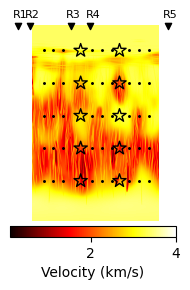

In [63]:

fig.tight_layout()
fig.savefig(savepath + f'velocity_model.pdf', transparent=True, dpi = 300)


fig, ax = plt.subplots(figsize = (2, 3))
divider = make_axes_locatable(ax)
cax = divider.append_axes('bottom', size='5%', pad=0.05)

im = ax.imshow(vs_hr, cmap = 'hot', aspect='auto', rasterized=True, vmin = 0.1, vmax = 4)
cmap2 = ['k', 'k', 'k']


fig.colorbar(im, cax=cax, orientation='horizontal', label = "Velocity (km/s)")

for j, i in enumerate(indx):
    i = i *20
    ax.scatter(500, i, marker='*', edgecolors=cmap2[0], facecolors='none', s=100, linewidth=1)
    ax.scatter(900, i, marker='*', edgecolors=cmap2[0], facecolors='none', s=100, linewidth=1)

    ax.scatter(120, i, marker='.', edgecolors=cmap2[2], facecolors='k', s=5, linewidth=1)
    ax.scatter(220, i, marker='.', edgecolors=cmap2[2], facecolors=cmap2[2], s=5, linewidth=1)
    ax.scatter(320, i, marker='.', edgecolors=cmap2[2], facecolors=cmap2[2], s=5, linewidth=1)

    ax.scatter(620, i, marker='.', edgecolors=cmap2[2], facecolors=cmap2[2], s=5, linewidth=1)
    ax.scatter(720, i, marker='.', edgecolors=cmap2[2], facecolors=cmap2[2], s=5, linewidth=1)
    ax.scatter(820, i, marker='.', edgecolors=cmap2[2], facecolors=cmap2[2], s=5, linewidth=1)

    ax.scatter(1000, i, marker='.', edgecolors=cmap2[2], facecolors=cmap2[2], s=5, linewidth=1)
    ax.scatter(1100, i, marker='.', edgecolors=cmap2[2], facecolors=cmap2[2], s=5, linewidth=1)
    ax.scatter(1200, i, marker='.', edgecolors=cmap2[2], facecolors=cmap2[2], s=5, linewidth=1)


cc = 'k'


ax.scatter(-150, -2, marker='v', edgecolors=cc, facecolors=cc, s=20, linewidth=1)
ax.scatter(-20, -2, marker='v', edgecolors=cc, facecolors=cc, s=20, linewidth=1)
ax.scatter(400, -2, marker='v', edgecolors=cc, facecolors=cc, s=20, linewidth=1)
ax.scatter(1400, -2, marker='v', edgecolors=cc, facecolors=cc, s=20, linewidth=1)
ax.scatter(600, -2, marker='v', edgecolors=cc, facecolors=cc, s=20, linewidth=1)

ax.text(-150-50, -100, 'R1', fontsize = 8)
ax.text(-20-50, -100, 'R2', fontsize = 8)
ax.text(400-50, -100, 'R3', fontsize = 8)
ax.text(600-50, -100, 'R4', fontsize = 8)
ax.text(1400-50, -100, 'R5', fontsize = 8)


#ax.set_title('a.', loc='left', fontweight = 'bold')

ax.axis('off')

fig.tight_layout()
fig.savefig(savepath + f'velocity_model.pdf', transparent=True, dpi = 300)




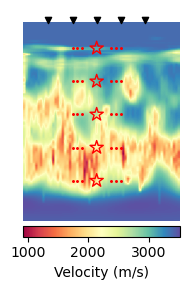

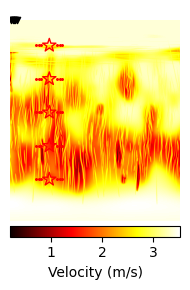

In [25]:

import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable


cmap = sns.diverging_palette(230, 30, as_cmap=True)
cmap = sns.color_palette("mako", as_cmap=True)
cmap = sns.color_palette("magma", as_cmap=True)
cmap = sns.cubehelix_palette(as_cmap=True)
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
cmap = sns.color_palette("Spectral", as_cmap=True)

cmap2 = sns.color_palette("rocket")
cmap2 = sns.color_palette("ch:s=-.2,r=.6", )
#cmap2 = sns.color_palette("coolwarm")

import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable


cmap = sns.diverging_palette(230, 30, as_cmap=True)
cmap = sns.color_palette("mako", as_cmap=True)
cmap = sns.color_palette("magma", as_cmap=True)
cmap = sns.cubehelix_palette(as_cmap=True)
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
cmap = sns.color_palette("Spectral", as_cmap=True)

cmap2 = sns.color_palette("rocket")
cmap2 = sns.color_palette("ch:s=-.2,r=.6", )
#cmap2 = sns.color_palette("coolwarm")

cmap2 = ['r', 'r', 'r']
fig, ax = plt.subplots(figsize = (2, 3))
divider = make_axes_locatable(ax)
cax = divider.append_axes('bottom', size='5%', pad=0.05)

im = ax.imshow(vs, cmap = cmap, aspect='auto')


fig.colorbar(im, cax=cax, orientation='horizontal', label = "Velocity (m/s)")

for j, i in enumerate(indx):

    ax.scatter(30, i, marker='*', edgecolors=cmap2[0], facecolors='none', s=100, linewidth=1)

    ax.scatter(20, i, marker='.', edgecolors=cmap2[2], facecolors=cmap2[2], s=5, linewidth=1)
    ax.scatter(22, i, marker='.', edgecolors=cmap2[2], facecolors=cmap2[2], s=5, linewidth=1)
    ax.scatter(24, i, marker='.', edgecolors=cmap2[2], facecolors=cmap2[2], s=5, linewidth=1)

    ax.scatter(36, i, marker='.', edgecolors=cmap2[2], facecolors=cmap2[2], s=5, linewidth=1)
    ax.scatter(38, i, marker='.', edgecolors=cmap2[2], facecolors=cmap2[2], s=5, linewidth=1)
    ax.scatter(40, i, marker='.', edgecolors=cmap2[2], facecolors=cmap2[2], s=5, linewidth=1)

cc = 'k'


ax.scatter(10, -2, marker='v', edgecolors=cc, facecolors=cc, s=20, linewidth=1)
ax.scatter(20, -2, marker='v', edgecolors=cc, facecolors=cc, s=20, linewidth=1)
ax.scatter(30, -2, marker='v', edgecolors=cc, facecolors=cc, s=20, linewidth=1)
ax.scatter(40, -2, marker='v', edgecolors=cc, facecolors=cc, s=20, linewidth=1)
ax.scatter(50, -2, marker='v', edgecolors=cc, facecolors=cc, s=20, linewidth=1)

#ax.set_title('a.', loc='left', fontweight = 'bold')

ax.axis('off')


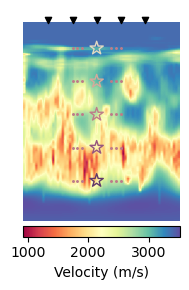

In [10]:

import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable


cmap = sns.diverging_palette(230, 30, as_cmap=True)
cmap = sns.color_palette("mako", as_cmap=True)
cmap = sns.color_palette("magma", as_cmap=True)
cmap = sns.cubehelix_palette(as_cmap=True)
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
cmap = sns.color_palette("Spectral", as_cmap=True)

cmap2 = sns.color_palette("rocket")
cmap2 = sns.color_palette("ch:s=-.2,r=.6", )
#cmap2 = sns.color_palette("coolwarm")

fig, ax = plt.subplots(figsize = (2, 3))
divider = make_axes_locatable(ax)
cax = divider.append_axes('bottom', size='5%', pad=0.05)

im = ax.imshow(vs, cmap = cmap, aspect='auto')


fig.colorbar(im, cax=cax, orientation='horizontal', label = "Velocity (m/s)")

for j, i in enumerate(indx):

    ax.scatter(30, i, marker='*', edgecolors=cmap2[j], facecolors='none', s=100, linewidth=1)

    ax.scatter(20, i, marker='.', edgecolors=cmap2[2], facecolors=cmap2[2], s=5, linewidth=1)
    ax.scatter(22, i, marker='.', edgecolors=cmap2[2], facecolors=cmap2[2], s=5, linewidth=1)
    ax.scatter(24, i, marker='.', edgecolors=cmap2[2], facecolors=cmap2[2], s=5, linewidth=1)

    ax.scatter(36, i, marker='.', edgecolors=cmap2[2], facecolors=cmap2[2], s=5, linewidth=1)
    ax.scatter(38, i, marker='.', edgecolors=cmap2[2], facecolors=cmap2[2], s=5, linewidth=1)
    ax.scatter(40, i, marker='.', edgecolors=cmap2[2], facecolors=cmap2[2], s=5, linewidth=1)

cc = 'k'


ax.scatter(10, -2, marker='v', edgecolors=cc, facecolors=cc, s=20, linewidth=1)
ax.scatter(20, -2, marker='v', edgecolors=cc, facecolors=cc, s=20, linewidth=1)
ax.scatter(30, -2, marker='v', edgecolors=cc, facecolors=cc, s=20, linewidth=1)
ax.scatter(40, -2, marker='v', edgecolors=cc, facecolors=cc, s=20, linewidth=1)
ax.scatter(50, -2, marker='v', edgecolors=cc, facecolors=cc, s=20, linewidth=1)

#ax.set_title('a.', loc='left', fontweight = 'bold')

ax.axis('off')

fig.tight_layout()
fig.savefig(savepath + f'velocity_model.pdf', transparent=True, dpi = 300)



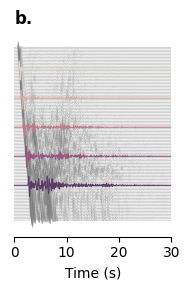

In [12]:
fig, ax = plt.subplots( figsize = (2, 3))

for j, i in enumerate(range(0, 120, 1)):
    nmdata = data[indxvs[i, 30]][0]/ np.max(abs(data[indxvs[i, 30]][0]))

    ax.plot(time, 5* nmdata+j*1, lw = 0.5, c = 'gray', alpha = 0.5)

for j, i in enumerate(indx):
    nmdata = data[indxvs[i, 30]][0]/ np.max(abs(data[indxvs[i, 30]][0]))

    ax.plot(time, 7.5*nmdata+i, lw = 0.75, c = cmap2[j])


ax.set_xlim(0, 30)
fig.gca().invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

ax.set_xlabel('Time (s)')

ax.set_title('b.', loc='left', fontweight = 'bold')


fig.tight_layout()
fig.savefig(savepath + f'data.png', transparent=True)



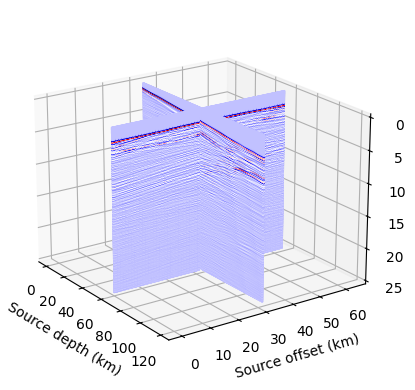

In [24]:
def plot_quadrants(ax, array, fixed_coord, cmap):
    """For a given 3d *array* plot a plane with *fixed_coord*, using four quadrants."""
    nx, ny, nz = array.shape

    index = {
        'x': (nx // 2, slice(None), slice(None)),
        'y': (slice(None), ny // 2, slice(None)),
        'z': (slice(None), slice(None), nz // 2),
    }[fixed_coord]
    plane_data = array[index]
    
    n0, n1 = plane_data.shape
    
    quadrants = [
        plane_data[:n0 // 2, :n1 // 2],
        plane_data[:n0 // 2, n1 // 2:],
        plane_data[n0 // 2:, :n1 // 2],
        plane_data[n0 // 2:, n1 // 2:]
    ]


    min_val = array.min()
    max_val = array.max()

    cmap = plt.get_cmap(cmap)

    for i, quadrant in enumerate(quadrants):

        facecolors = cmap((quadrant - min_val) / (max_val - min_val))

        if fixed_coord == 'x':

            Y, Z = np.mgrid[0:ny // 2, 0:nz // 2]
            X = nx // 2 * np.ones_like(Y)
            Y_offset = (i // 2) * ny // 2
            Z_offset = (i % 2) * nz // 2
 
            ax.plot_surface(X, Y + Y_offset, (Z + Z_offset) /sr , rstride=1, cstride=1,
                            facecolors=facecolors, shade=False, rasterized=True)

        elif fixed_coord == 'y':
            X, Z = np.mgrid[0:nx // 2, 0:nz // 2]
            Y = ny // 2 * np.ones_like(X)
            X_offset = (i // 2) * nx // 2
            Z_offset = (i % 2) * nz // 2 
            ax.plot_surface(X + X_offset, Y, (Z + Z_offset) /sr, rstride=1, cstride=1,
                            facecolors=facecolors, shade=False, rasterized=True)
        elif fixed_coord == 'z':
            X, Y = np.mgrid[0:nx // 2, 0:ny // 2]
            Z = nz // 2 * np.ones_like(X)
            X_offset = (i // 2) * nx // 2
            Y_offset = (i % 2) * ny // 2
            ax.plot_surface(X + X_offset, Y + Y_offset, Z /sr, rstride=1, cstride=1,
                            facecolors=facecolors, shade=False, rasterized=True)

                            
def figure_3D_array_slices(array, cmap=None):
    """Plot a 3d array using three intersecting centered planes."""
    fig = plt.figure(figsize = (5, 4))
    ax = fig.add_subplot(projection='3d')
    plot_quadrants(ax, array, 'x', cmap=cmap)
    plot_quadrants(ax, array, 'y', cmap=cmap)
    #plot_quadrants(ax, array, 'z', cmap=cmap)

    ax.set_xlabel('Source depth (km)')
    ax.set_ylabel("Source offset (km)")
    ax.set_zlabel("Time (s)", rotation=90)
    ax.zaxis.labelpad=+4.5 # <- change the value here

    ax.invert_zaxis()
    fig.tight_layout()
    
    return fig, ax


fig, ax = figure_3D_array_slices(dnew[:,:,:1000][:,:,:], cmap='seismic')
ax.view_init(elev=20., azim=-35, roll=0)
#ax.set_title('b.', loc='left', fontweight = 'bold')

fig.tight_layout()
fig.savefig(savepath + f'data2.pdf', transparent=True, dpi = 300)



In [21]:

savepath

'/bettik/dokhtdor/projects/mirko_volcano_simulations/figures/final_version/figure02/'

In [ ]:

scd[-1]

24

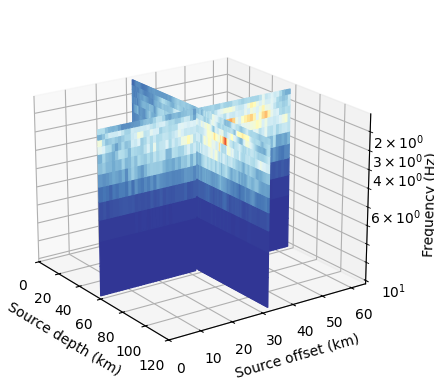

In [23]:


def plot_quadrants(ax, array, fixed_coord, cmap):
    """For a given 3d *array* plot a plane with *fixed_coord*, using four quadrants."""
    nx, ny, nz = array.shape

    index = {
        'x': (nx // 2, slice(None), slice(None)),
        'y': (slice(None), ny // 2, slice(None)),
        'z': (slice(None), slice(None), nz // 2),
    }[fixed_coord]
    plane_data = array[index]
    
    n0, n1 = plane_data.shape
    
    quadrants = [
        plane_data[:n0 // 2, :n1 ],

        plane_data[n0 // 2 :, :n1],
    ]


    min_val = array.min()
    max_val = array.max()

    cmap = plt.get_cmap(cmap)

    for i, quadrant in enumerate(quadrants):
        i = i*2
        facecolors = cmap((quadrant - min_val) / (max_val - min_val))

        if fixed_coord == 'x':
            Y, Z = np.mgrid[0:ny//2, 0:nz]
            X = nx // 2 * np.ones_like(Y)
            Y_offset = (i // 2) * ny // 2
            Z_offset = (i % 2) * nz // 2


            Z = Z*0 + network.banks[0].centers[np.newaxis, :]
            ax.plot_surface(X[:, 3:], (Y + Y_offset)[:, 3:], (Z + Z_offset)[:, 3:]  , rstride=1, cstride=1,
                            facecolors=facecolors[:,3:], shade=False, rasterized=True)

            
        elif fixed_coord == 'y':
            X, Z = np.mgrid[0:nx // 2, 0:nz ]
            Y = ny // 2 * np.ones_like(X)
            X_offset = (i // 2) * nx // 2
            Z_offset = (i % 2) * nz // 2 
            
            Z = Z*0 + network.banks[0].centers[np.newaxis, :]

            ax.plot_surface( (X + X_offset)[:,3:], Y[:,3:], (Z + Z_offset)[:,3:] , rstride=1, cstride=1,
                            facecolors=facecolors[:,3:] , shade=False, rasterized=True)

            
def figure_3D_array_slices(array, cmap=None):
    """Plot a 3d array using three intersecting centered planes."""
    fig = plt.figure(figsize = (5, 4))
    ax = fig.add_subplot(projection='3d')
    plot_quadrants(ax, array, 'x', cmap=cmap)
    plot_quadrants(ax, array, 'y', cmap=cmap)
    #plot_quadrants(ax, array, 'z', cmap=cmap)

    ax.set_xlabel('Source depth (km)')
    ax.set_ylabel("Source offset (km)")
    ax.set_zlabel("Frequency (Hz)", rotation=90)
    ax.zaxis.labelpad=+4.5 # <- change the value here

    ax.invert_zaxis()
    fig.tight_layout()
    
    return fig, ax


    #ax.invert_zaxis()
    #fig.tight_layout()



#cmap = sns.color_palette("Spectral", as_cmap=True)

scd = sc[0][:,0, :].shape

array = (np.median(sc[0][:,::2, :], axis = 1).reshape(120,65, scd[-1]))



fig, ax = figure_3D_array_slices(array, cmap='RdYlBu_r')



ax.set_xlim(0, 120)
ax.set_ylim(0, 65)
#ax.set_zlim(10, 0)
ax.set_zscale('log')

ax.view_init(elev=20., azim=-35, roll=0)

fig.tight_layout()
fig.savefig(savepath + f'features2.pdf', transparent=True, dpi = 300)



/tmp/ipykernel_199816/2183406379.py:82: RuntimeWarning: All-NaN slice encountered
  array = (np.nanmedian(np.nanmedian(sc[1][:,:, :], axis = 1), axis = 1).reshape(120,65, scd[-1]))


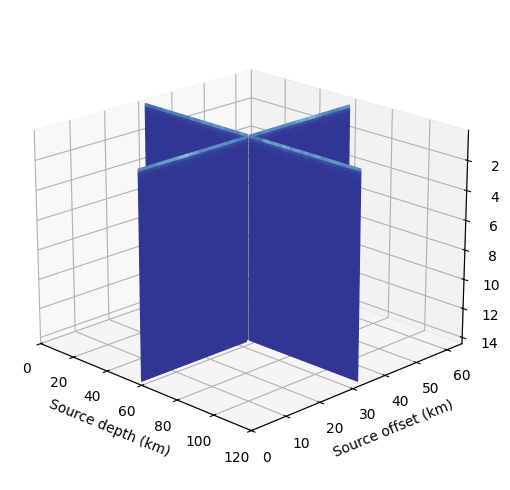

In [17]:


def plot_quadrants(ax, array, fixed_coord, cmap):
    """For a given 3d *array* plot a plane with *fixed_coord*, using four quadrants."""
    nx, ny, nz = array.shape

    index = {
        'x': (nx // 2, slice(None), slice(None)),
        'y': (slice(None), ny // 2, slice(None)),
        'z': (slice(None), slice(None), nz // 2),
    }[fixed_coord]
    plane_data = array[index]
    
    n0, n1 = plane_data.shape
    
    quadrants = [
        plane_data[:n0 // 2, :n1 ],

        plane_data[n0 // 2 :, :n1],
    ]


    min_val = np.nanmin(array) 
    max_val = np.nanmax(array) 

    cmap = plt.get_cmap(cmap)

    for i, quadrant in enumerate(quadrants):
        i = i*2
        facecolors = cmap((quadrant - min_val) / (max_val - min_val))

        if fixed_coord == 'x':
            Y, Z = np.mgrid[0:ny//2, 0:nz]
            X = nx // 2 * np.ones_like(Y)
            Y_offset = (i // 2) * ny // 2
            Z_offset = (i % 2) * nz // 2


            Z = Z*0 + network.banks[1].centers[np.newaxis, :]
            ax.plot_surface(X[:,:], (Y + Y_offset)[:,:], (Z + Z_offset)[:,:]  , rstride=1, cstride=1,
                            facecolors=facecolors[:,:], shade=False)

            
        elif fixed_coord == 'y':
            X, Z = np.mgrid[0:nx // 2, 0:nz ]
            Y = ny // 2 * np.ones_like(X)
            X_offset = (i // 2) * nx // 2
            Z_offset = (i % 2) * nz // 2 
            
            Z = Z*0 + network.banks[1].centers[np.newaxis, :]

            ax.plot_surface( (X + X_offset)[:,:], Y[:,:], (Z + Z_offset)[:,:] , rstride=1, cstride=1,
                            facecolors=facecolors[:,:] , shade=False)

            
def figure_3D_array_slices(array, cmap=None):
    """Plot a 3d array using three intersecting centered planes."""
    fig = plt.figure(figsize = (6, 5))
    ax = fig.add_subplot(projection='3d')
    plot_quadrants(ax, array, 'x', cmap=cmap)
    plot_quadrants(ax, array, 'y', cmap=cmap)
    #plot_quadrants(ax, array, 'z', cmap=cmap)

    ax.set_xlabel('Source depth (km)')
    ax.set_ylabel("Source offset (km)")
    ax.set_zlabel("Frequency (Hz)", rotation=90)
    ax.zaxis.labelpad=+4.5 # <- change the value here

    ax.invert_zaxis()
    fig.tight_layout()
    
    return fig, ax


    #ax.invert_zaxis()
    #fig.tight_layout()



cmap = sns.color_palette("Spectral", as_cmap=True)

scd = sc[1][:,0, :].shape

array = (np.nanmedian(np.nanmedian(sc[1][:,:, :], axis = 1), axis = 1).reshape(120,65, scd[-1]))



fig, ax = figure_3D_array_slices(array, cmap='RdYlBu_r')



ax.set_xlim(0, 120)
ax.set_ylim(0, 65)
#ax.set_zlim(10, 0)
#ax.set_zscale('log')

ax.view_init(elev=20., azim=-45, roll=0)


fig.tight_layout()
fig.savefig(savepath + f'features.png', transparent=True, dpi = 300)



In [ ]:

sc[1].shape, scd

((7800, 10, 24, 14), (7800, 24, 14))

In [ ]:
        elif fixed_coord == 'y':
            X, Z = np.mgrid[0:nx // 2, 0:nz // 2]
            Y = ny // 2 * np.ones_like(X)
            X_offset = (i // 2) * nx // 2
            Z_offset = (i % 2) * nz // 2 
            ax.plot_surface(X + X_offset, Y, (Z + Z_offset) , rstride=1, cstride=1,
                            facecolors=facecolors, shade=False)


SyntaxError: invalid syntax (1997820547.py, line 1)